In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("/Users/daichisato/Downloads/node_new.csv")
df=df.fillna(0)

In [3]:
df.columns

Index(['objectid', 'signal_f', 'name_kanji', 'name_yomi', 'density_5000m',
       'density_500m', 'xing_count', 'len1', 'len2', 'len3', 'len4', 'len5',
       'len6', 'len7', 'len8', 'linecnt1', 'linecnt2', 'linecnt3', 'linecnt4',
       'linecnt5', 'linecnt6', 'linecnt7', 'linecnt8', 'angle1', 'angle2',
       'angle3', 'angle4', 'angle5', 'angle6', 'angle7', 'angle8',
       'roadwidth1', 'roadwidth2', 'roadwidth3', 'roadwidth4', 'roadwidth5',
       'roadwidth6', 'roadwidth7', 'roadwidth8', 'lane_count1', 'lane_count2',
       'lane_count3', 'lane_count4', 'lane_count5', 'lane_count6',
       'lane_count7', 'lane_count8', 'roadclass1', 'roadclass2', 'roadclass3',
       'roadclass4', 'roadclass5', 'roadclass6', 'roadclass7', 'roadclass8',
       'double_line_4way', 'length_station', 'acc_angle_station',
       'angle_per_length_station', 'length_school', 'acc_angle_school',
       'angle_per_length_school', 'closeness_5000', 'closeness_500',
       'betweenness_5000', 'betweenness_5

### インポータンスの安定度を見る
車両相互
１回目

df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00017 else 2)

In [5]:
df["車両相互フラグ"].value_counts()

1    2931
0    1351
2     678
Name: 車両相互フラグ, dtype: int64

In [7]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1224)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1224)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", ""]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [8]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [9]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.78163265306122454

0.69230769230769229

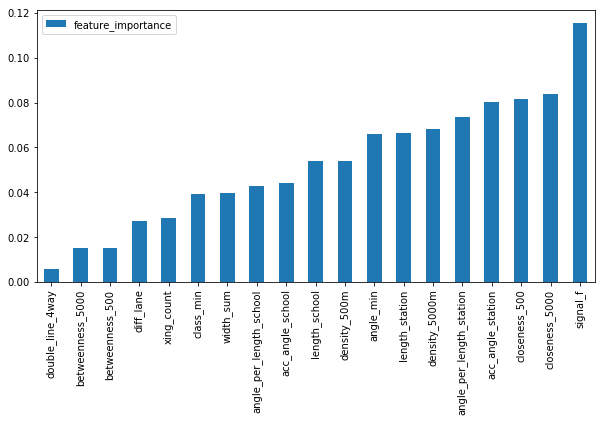

In [10]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()






２回目

In [11]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1224)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1224)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [12]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [13]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.79795918367346941

0.65546218487394958

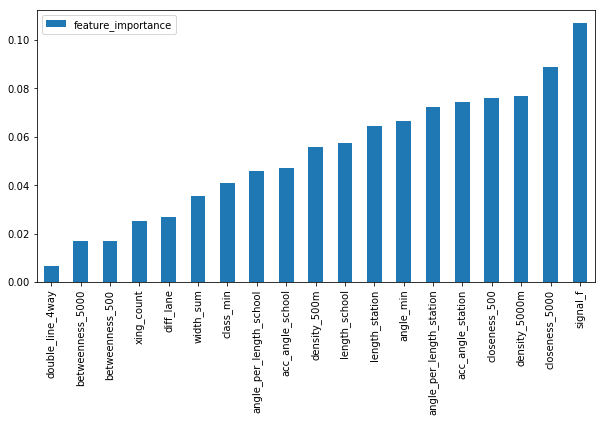

In [14]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()


3回目

In [15]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1224)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1224)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [16]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [17]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.75102040816326532

0.62753036437246967

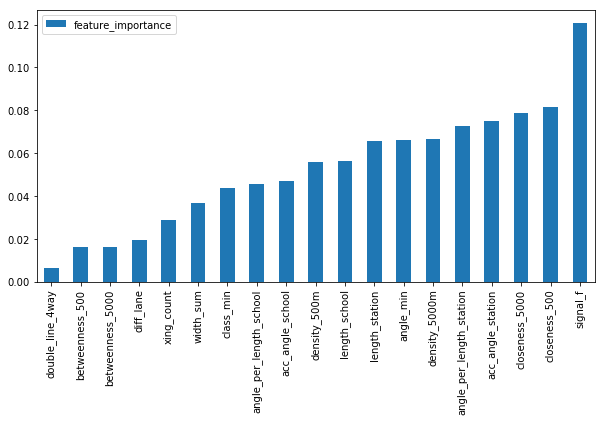

In [18]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()



### 人対車両
1回目

In [21]:
df["人対車両フラグ"]=df.人対車両率.map(lambda x: 0 if x==0 else 1 if  x<0.000065 else 2)

In [22]:
df["人対車両フラグ"].value_counts()

0    4471
1     388
2     101
Name: 人対車両フラグ, dtype: int64

In [24]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["人対車両フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=489)

make_no_accidents=df[df["人対車両フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=489)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["人対車両フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [25]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [26]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.63265306122448983

0.59375

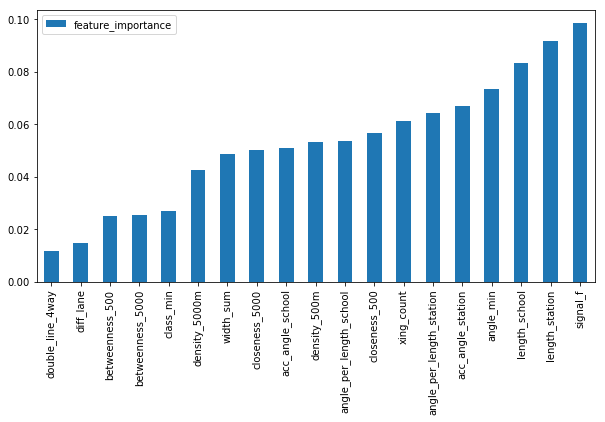

In [27]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()


2回目

In [28]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["人対車両フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=489)

make_no_accidents=df[df["人対車両フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=489)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["人対車両フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [29]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [30]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.64795918367346939

0.72222222222222221

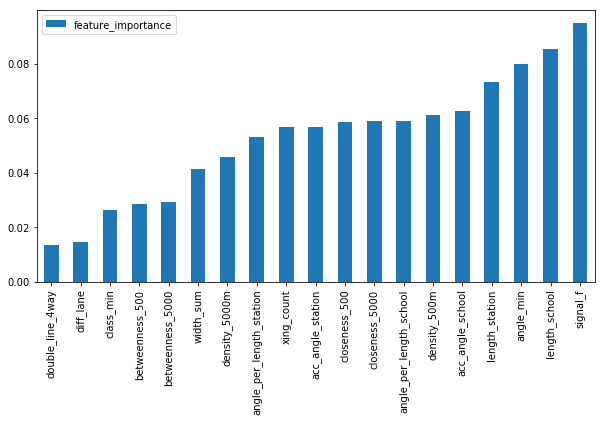

In [31]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()



3回目

In [32]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["人対車両フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=489)

make_no_accidents=df[df["人対車両フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=489)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["人対車両フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [33]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [34]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.66326530612244894

0.58333333333333337

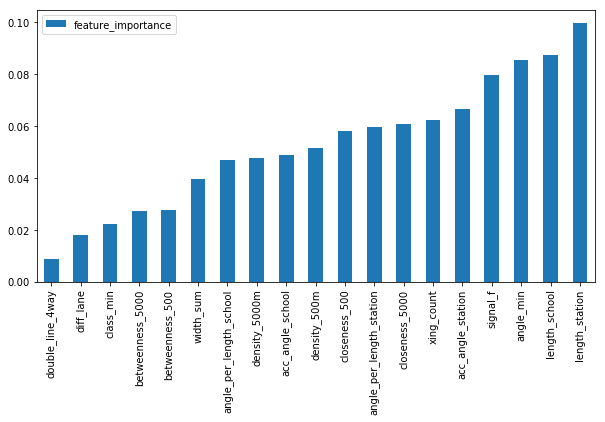

In [35]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




### 車両単独
1回目

In [41]:
df["車両単独フラグ"]=df.車両単独率.map(lambda x: 0 if x==0 else 1 if x<0.0000210 else 2)

In [42]:
df["車両単独フラグ"].value_counts()

0    4847
2      85
1      28
Name: 車両単独フラグ, dtype: int64

In [43]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両単独フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=113)

make_no_accidents=df[df["車両単独フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=113)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両単独フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [44]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [45]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.56521739130434778

0.54166666666666663

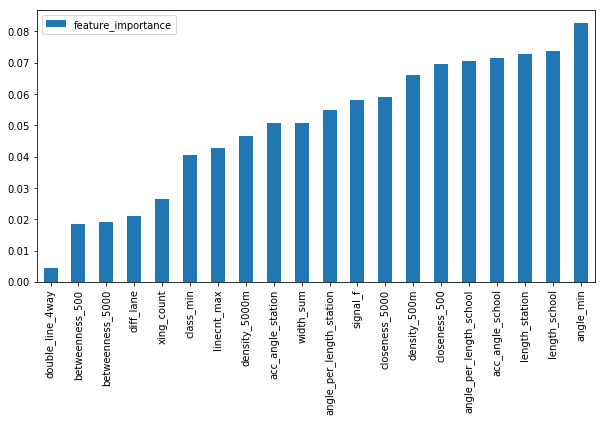

In [46]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




2回目

In [47]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両単独フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=113)

make_no_accidents=df[df["車両単独フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=113)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両単独フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [48]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [49]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.47826086956521741

0.20000000000000001

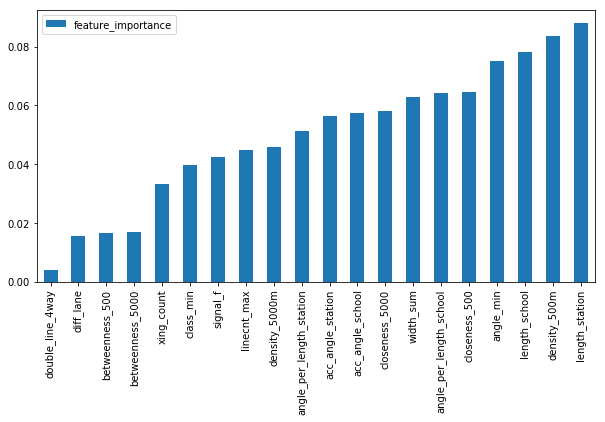

In [50]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()



